<img src="https://devra.ai/analyst/notebook/2217/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">  <div style="font-size:150%; color:#FEE100"><b>XAU/USD Gold Price Analysis and Prediction Notebook</b></div>  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>Gold price data has always been a fascinating study in market behavior. In this notebook, we dive into historical daily and hourly gold price data, explore various visualization techniques, and even build a predictor to forecast closing prices. If you find these insights valuable, please consider upvoting the notebook.

## Table of Contents
- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Conclusion](#Conclusion)

## Introduction

In our quest to understand the dynamics of gold pricing, we explore two datasets containing historical gold prices in daily and hourly intervals. The analysis leverages various visualization techniques, ranging from heatmaps to boxen plots, to reveal hidden trends and potential forecasting insights. The daily dataset, with its aggregated price points, offers an excellent ground for building a predictive model for the closing price using key features like Open, High, Low, and Volume.

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set the plot style
sns.set(style='whitegrid')

## Data Loading

We work with two files:

- `XAU_1d_data.csv` containing daily data
- `XAU_1h_data.csv` containing hourly data

Both CSV files use a semicolon (`;`) delimiter and are encoded in ASCII. For our initial analysis, we focus on the daily dataset.

In [2]:
# Load the daily data
daily_file_path = '/kaggle/input/xauusd-gold-price-historical-data-2004present/XAU_1d_data.csv'

try:
    # Read CSV file with semicolon delimiter and ASCII encoding
    df_daily = pd.read_csv(daily_file_path, delimiter=';', encoding='ascii')
    
    # Convert the Date column to datetime. Using errors='coerce' to handle unexpected formats
    df_daily['Date'] = pd.to_datetime(df_daily['Date'], errors='coerce', infer_datetime_format=True)
    
    # Remove any rows where date conversion failed
    df_daily = df_daily.dropna(subset=['Date'])
    
except Exception as e:
    print(f"Error loading or processing the daily file: {e}")
    raise

## Data Cleaning and Preprocessing

In this step, we ensure that our dataset is ready for analysis. Aside from the date conversion error handling, we inspect missing values and data types of our columns. For additional future improvements, one might consider more advanced cleaning methods for outliers and erroneous entries.

In [3]:
# Display basic info and check for missing values
print('Data Information:')
print(df_daily.info())

print('\nSummary Statistics:')
print(df_daily.describe())

# Check for missing values
missing_values = df_daily.isnull().sum()
print('\nMissing values per column:')
print(missing_values)

# If missing values are found in numeric columns, one could consider imputation methods.
# For now, we assume the remaining data is clean enough for exploratory analysis and modeling.

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5391 non-null   datetime64[ns]
 1   Open    5391 non-null   float64       
 2   High    5391 non-null   float64       
 3   Low     5391 non-null   float64       
 4   Close   5391 non-null   float64       
 5   Volume  5391 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 252.8 KB
None

Summary Statistics:
                                Date         Open         High          Low  \
count                           5391  5391.000000  5391.000000  5391.000000   
mean   2014-12-21 05:40:02.003339008  1351.249024  1361.248208  1341.127752   
min              2004-06-11 00:00:00   382.800000   384.800000   381.100000   
25%              2009-09-26 12:00:00  1008.135000  1018.045000   999.275000   
50%              2014-12-24 00:0

## Exploratory Data Analysis

We now explore the dataset visually and statistically. The following analysis includes multiple visualizations:

- A correlation heatmap for the numeric columns ('Open', 'High', 'Low', 'Close', 'Volume').
- A pair plot to showcase relationships between the price columns and volume.
- Histograms to observe the distribution of each numeric variable.
- Box plots and violin plots for identifying data dispersion and outliers.

The goal here is to reveal underlying patterns and potential predictive features.

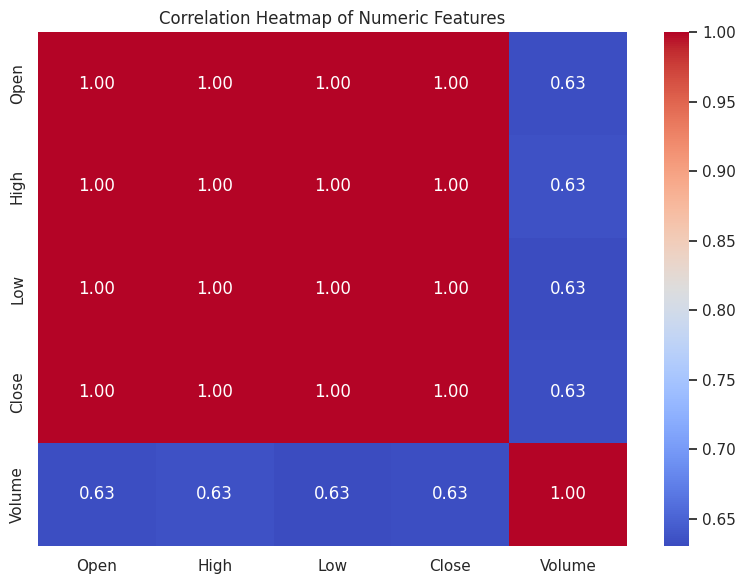

In [4]:
# Select only numeric columns for correlation analysis
numeric_df = df_daily.select_dtypes(include=[np.number])

# Check if there are four or more numeric columns before plotting the heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns to plot a correlation heatmap.')

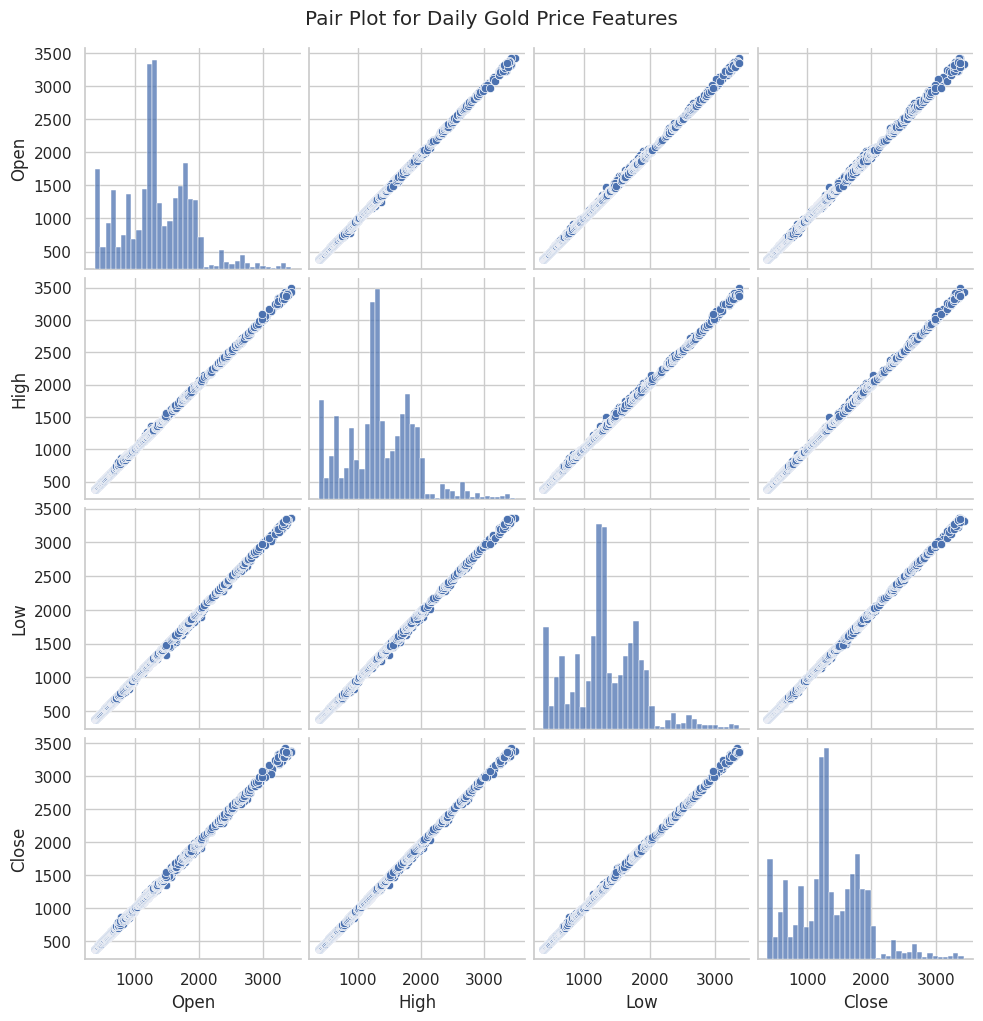

In [5]:
# Create a pair plot for a visual overview of the relationships
sns.pairplot(df_daily.drop(columns=['Volume']) if 'Volume' in df_daily.columns else df_daily)
plt.suptitle('Pair Plot for Daily Gold Price Features', y=1.02)
plt.show()

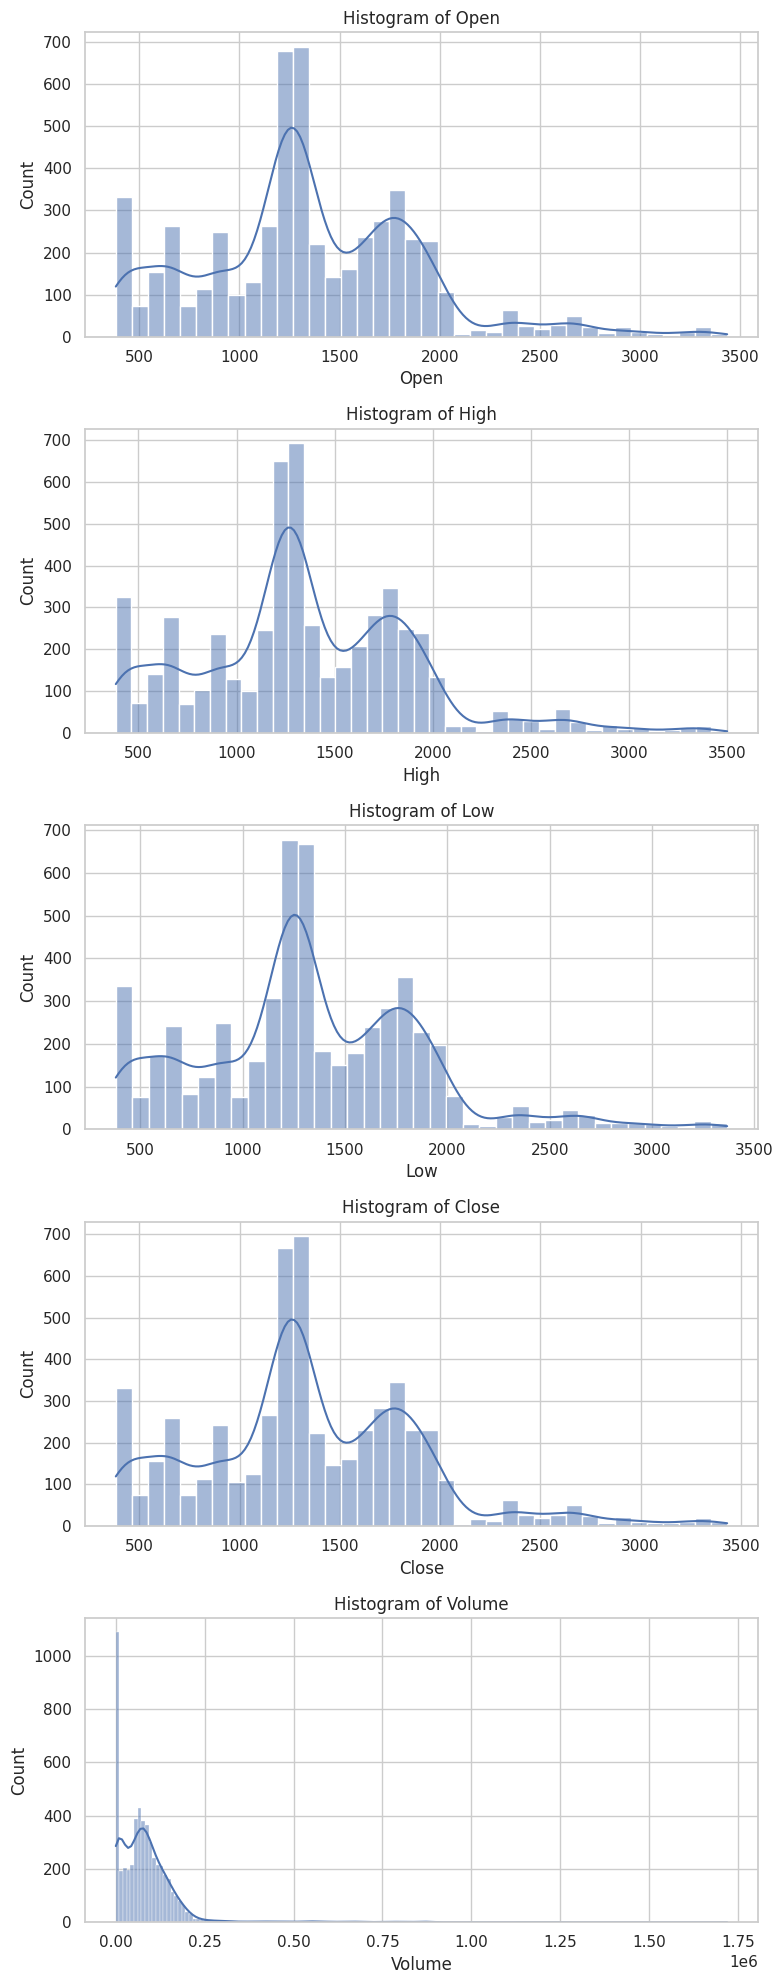

In [6]:
# Plot histograms for each numeric column
numeric_columns = numeric_df.columns
fig, ax = plt.subplots(len(numeric_columns), 1, figsize=(8, 4 * len(numeric_columns)))

for i, col in enumerate(numeric_columns):
    sns.histplot(df_daily[col], ax=ax[i], kde=True)
    ax[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

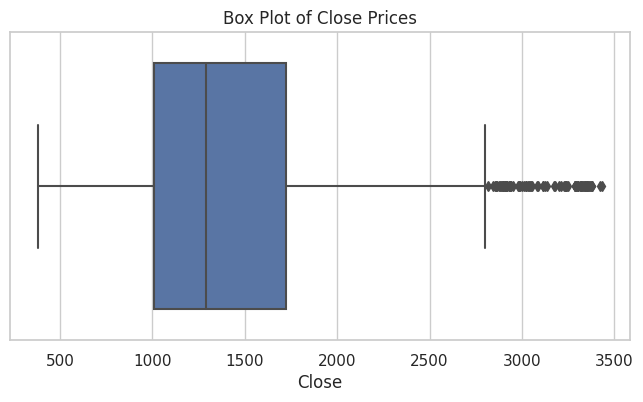

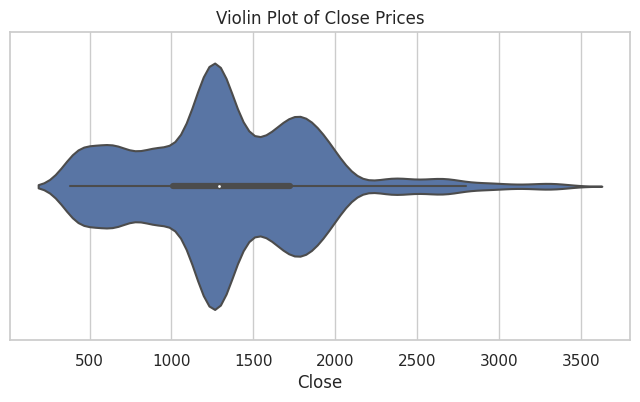

In [7]:
# Box plot for Close price
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_daily['Close'])
plt.title('Box Plot of Close Prices')
plt.show()

# Violin plot for Close price
plt.figure(figsize=(8, 4))
sns.violinplot(x=df_daily['Close'])
plt.title('Violin Plot of Close Prices')
plt.show()

## Predictive Modeling

Based on the hypothesis that the closing price of gold can be predicted from other numerical features, we build a simple linear regression model. The features we use include 'Open', 'High', 'Low', and 'Volume', and we predict the 'Close' price. We then evaluate the model using the R² score on a test split.

In production notebooks, unexpected errors such as multicollinearity or scaling issues might prompt further preprocessing. This example provides a straightforward approach that, while simplistic, serves as a baseline model.

In [8]:
# Define features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Check if all features exist in the dataframe
for feature in features:
    if feature not in df_daily.columns:
        raise ValueError(f"Feature '{feature}' not found in dataset")

# Split the data into training and testing sets
X = df_daily[features]
y = df_daily[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the R² score as the prediction accuracy metric
score = r2_score(y_test, y_pred)
print(f'R² Score of the Linear Regression Model: {score:.4f}')

R² Score of the Linear Regression Model: 0.9999


## Conclusion

Our analysis of the XAU/USD gold price data has provided interesting insights into the relationships between different price points and volume. The exploratory analysis, utilizing a variety of visualization methods, helped identify patterns and potential outliers. Furthermore, the predictive model, built using linear regression, offers a baseline for forecasting gold's closing price. Future directions for this analysis include:

- Experimenting with advanced machine learning techniques and feature engineering.
- Incorporating the hourly dataset to capture more granular trends.
- Addressing potential non-linear relationships or seasonality in time series data.

Thank you for exploring this notebook. If you found the insights useful, please consider upvoting it.